In [1]:
#!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

In [2]:
tickers=["RELIANCE.NS"]

In [3]:
stock_data=yf.download(tickers,start="2012-01-01")
stock_data

[*********************100%***********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2012-01-02   345.128540   351.542725   340.348846   349.957764   323.036774   
2012-01-03   352.780975   360.037201   351.839905   358.922760   331.312073   
2012-01-04   360.284851   362.043182   353.325836   354.712677   327.425964   
2012-01-05   354.143066   359.071350   343.791199   346.465851   319.813477   
2012-01-06   345.252350   358.600830   345.054230   355.406097   328.065979   
...                 ...          ...          ...          ...          ...   
2022-07-29  2474.699951  2517.100098  2464.000000  2509.449951  2509.449951   
2022-08-01  2519.149902  2587.750000  2507.600098  2574.850098  2574.850098   
2022-08-02  2572.500000  2607.800049  2561.550049  2584.649902  2584.649902   
2022-08-03  2600.000000  2610.000000  2567.449951  2606.350098  2606.350098   
2022-08-04  2610.000000  2617.750000  2535.000000  2571.899902  2571.899902   

              Volume  
Date                  
2012-01-02   8679938  
2012-01-03   9455771  
2012-01-04   8557084  
2012-01-05  13364666  
2012-01-06   9495456  
...              ...  
2022-07-29   6982808  
2022-08-01   7245568  
2022-08-02   6423115  
2022-08-03   6576824  
2022-08-04   6675044  

[2613 rows x 6 columns]

# Data understanding

In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2613 entries, 2012-01-02 to 2022-08-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2613 non-null   float64
 1   High       2613 non-null   float64
 2   Low        2613 non-null   float64
 3   Close      2613 non-null   float64
 4   Adj Close  2613 non-null   float64
 5   Volume     2613 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 142.9 KB


In [5]:
stock_data.describe()

Open         High          Low        Close    Adj Close  \
count  2613.000000  2613.000000  2613.000000  2613.000000  2613.000000   
mean   1017.324029  1029.093504  1004.983326  1016.554819  1001.257644   
std     709.996963   718.326514   700.954549   709.287005   716.430670   
min     334.330872   338.194244   333.365021   334.875702   309.114929   
25%     445.279205   449.736938   439.657501   445.081085   424.977875   
50%     661.133118   666.086182   655.288513   659.597656   642.710266   
75%    1410.000000  1427.914795  1389.479126  1403.694336  1393.959106   
max    2856.149902  2856.149902  2786.100098  2819.850098  2819.850098   

             Volume  
count  2.613000e+03  
mean   8.593927e+06  
std    6.075495e+06  
min    0.000000e+00  
25%    5.199824e+06  
50%    6.908329e+06  
75%    9.715700e+06  
max    6.584835e+07

**Here the Maximum value of share in Open column is 2856.149902 and minimum value 78.152176.
     the Maximum value of share in High column is 2856.149902 and minimum value 78.894859 	.
     the Maximum value of share in Low column is 2786.100098 and minimum value 77.610634.
     the Maximum value of share in Close column is 2819.850098 	 and minimum value 66.971481.**

In [6]:
stock_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
Skewness_df=pd.DataFrame({"Feature":["Open","High","Low","Close","Adje Close","Volume"],
                         "Skewness":[stock_data.Open.skew(),stock_data.High.skew(),stock_data.Low.skew(),
                                    stock_data.Close.skew(),stock_data["Adj Close"].skew(),stock_data.Volume.skew()]})
Skewness_df

Feature  Skewness
0        Open  0.962851
1        High  0.962219
2         Low  0.964591
3       Close  0.963520
4  Adje Close  0.962206
5      Volume  3.596573

In [9]:
new_stock_data=stock_data[["Close"]]
new_stock_data

Close
Date                   
2012-01-02   349.957764
2012-01-03   358.922760
2012-01-04   354.712677
2012-01-05   346.465851
2012-01-06   355.406097
...                 ...
2022-07-29  2509.449951
2022-08-01  2574.850098
2022-08-02  2584.649902
2022-08-03  2606.350098
2022-08-04  2571.899902

[2613 rows x 1 columns]

In [10]:
series=new_stock_data.reset_index()
series

Date        Close
0    2012-01-02   349.957764
1    2012-01-03   358.922760
2    2012-01-04   354.712677
3    2012-01-05   346.465851
4    2012-01-06   355.406097
...         ...          ...
2608 2022-07-29  2509.449951
2609 2022-08-01  2574.850098
2610 2022-08-02  2584.649902
2611 2022-08-03  2606.350098
2612 2022-08-04  2571.899902

[2613 rows x 2 columns]

In [11]:
series.head()

Date       Close
0 2012-01-02  349.957764
1 2012-01-03  358.922760
2 2012-01-04  354.712677
3 2012-01-05  346.465851
4 2012-01-06  355.406097

In [12]:
rcParams['figure.figsize'] = 17,8
decomposition =seasonal_decompose(series.Close,freq=10)
fig = decomposition.plot()
plt.show()

# Visualization

In [13]:
fig = px.line(x=series.Date,y=series.Close,labels={"x":"Date","y":"Closing price"})
fig.show()

In [14]:
fig = px.box(x=series.Date,y=series.Close,labels={"x":"Year","y":"Closing price"})
fig.show()

In [15]:
fig=px.bar(series,x=series.Date,y="Close")
fig.show()

In [16]:
plt.figure(figsize=(17,7))
sns.distplot(series.Close)
plt.title("Distribution of Closing Values between 2005 to 2022")
plt.xlabel("Closing Price")
plt.grid(True)
plt.show()

In [17]:
lag_plot(series.Close)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 10)'>

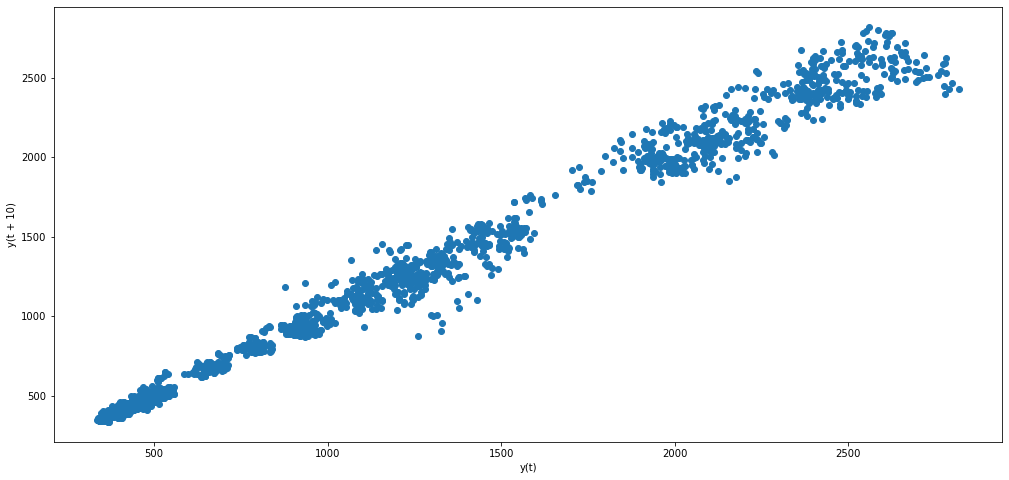

In [18]:
lag_plot(series.Close,lag=10)

# Data Preprocessing

In [19]:
series.shape

(2613, 2)

In [20]:
series

Date        Close
0    2012-01-02   349.957764
1    2012-01-03   358.922760
2    2012-01-04   354.712677
3    2012-01-05   346.465851
4    2012-01-06   355.406097
...         ...          ...
2608 2022-07-29  2509.449951
2609 2022-08-01  2574.850098
2610 2022-08-02  2584.649902
2611 2022-08-03  2606.350098
2612 2022-08-04  2571.899902

[2613 rows x 2 columns]

In [21]:
(20/100)*len(series),(80/100)*len(series)

(522.6, 2090.4)

In [22]:
y=np.round((20/100)*len(series),0)
y=int(y)
y

523

In [23]:
x=np.round((80/100)*len(series),0)
x=int(x)
x

2090

In [24]:
train=series.head(x)
test=series.tail(y)
train.shape,test.shape

((2090, 2), (523, 2))

In [25]:
train.head()

Date       Close
0 2012-01-02  349.957764
1 2012-01-03  358.922760
2 2012-01-04  354.712677
3 2012-01-05  346.465851
4 2012-01-06  355.406097

In [26]:
test.head()

Date        Close
2090 2020-07-03  1787.900024
2091 2020-07-06  1851.800049
2092 2020-07-07  1823.449951
2093 2020-07-08  1798.000000
2094 2020-07-09  1824.250000

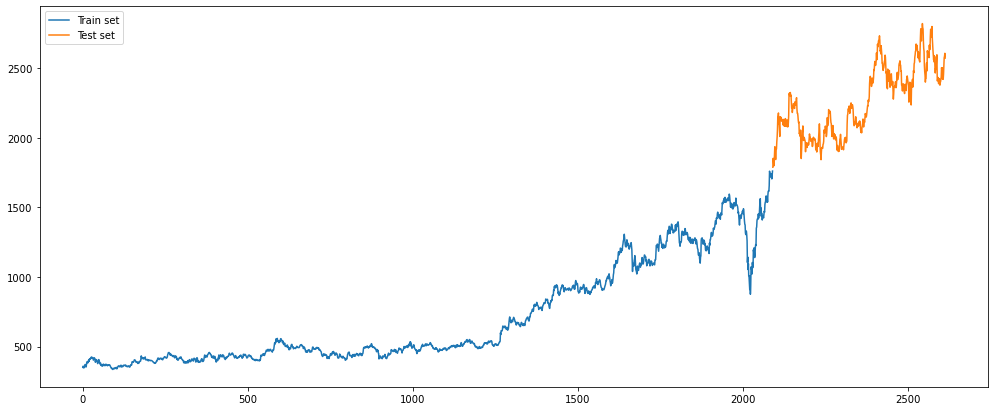

In [27]:
plt.figure(figsize=(17,7))
plt.plot(train.Close,label="Train set")
plt.plot(test.Close,label="Test set")
plt.legend()
plt.show()

### Defining Error Functions

In [28]:
def RMSE(actual,pred):
    temp=np.sqrt(np.mean((actual-pred)**2))
    return temp
def MAPE(pred,actual):
    temp=np.mean(np.abs((pred-actual)/actual)*100)
    return temp

* Creating moving averages

In [29]:
moving_avg_20=series.Close.rolling(20).mean()     # mean of first 20 values and put it in 21 th observation and so on..
moving_avg_20[20]

374.17321319580077

In [30]:
plt.figure(figsize=(17,7))
plt.plot(series.Close)
plt.plot(moving_avg_20,color="red")
plt.show()

In [31]:
train.shape,test.shape

((2090, 2), (523, 2))

In [32]:
train

Date        Close
0    2012-01-02   349.957764
1    2012-01-03   358.922760
2    2012-01-04   354.712677
3    2012-01-05   346.465851
4    2012-01-06   355.406097
...         ...          ...
2085 2020-06-26  1741.650024
2086 2020-06-29  1723.150024
2087 2020-06-30  1704.099976
2088 2020-07-01  1737.599976
2089 2020-07-02  1760.349976

[2090 rows x 2 columns]

In [33]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(series[["Close"]].values)
scaled_train=scaler.fit_transform(train[["Close"]].values)
scaled_test=scaler.fit_transform(test[["Close"]].values)
scaled_train

array([[0.01058038],
       [0.01686951],
       [0.01391605],
       ...,
       [0.96053945],
       [0.9840404 ],
       [1.        ]])

In [34]:
len(scaled_train),len(scaled_test),len(scaled_data),scaled_data.shape

(2090, 523, 2613, (2613, 1))

In [35]:
x_train=[]
y_train=[]

for i in range(20,len(scaled_train)):
  x_train.append(scaled_train[i-20:i])
  y_train.append(scaled_train[i,0])

x_train=np.array(x_train)
y_train=np.array(y_train)

In [36]:
x_train

array([[[0.01058038],
        [0.01686951],
        [0.01391605],
        ...,
        [0.03990658],
        [0.05013948],
        [0.04122694]],

       [[0.01686951],
        [0.01391605],
        [0.00813073],
        ...,
        [0.05013948],
        [0.04122694],
        [0.04899283]],

       [[0.01391605],
        [0.00813073],
        [0.0144025 ],
        ...,
        [0.04122694],
        [0.04899283],
        [0.0538921 ]],

       ...,

       [[0.84240331],
        [0.84657741],
        [0.87334045],
        ...,
        [0.97022047],
        [0.98688159],
        [0.97390346]],

       [[0.84657741],
        [0.87334045],
        [0.87467327],
        ...,
        [0.98688159],
        [0.97390346],
        [0.96053945]],

       [[0.87334045],
        [0.87467327],
        [0.86611475],
        ...,
        [0.97390346],
        [0.96053945],
        [0.9840404 ]]])

In [37]:
x_train.shape ,len(x_train)  # 1474= Rows , 20=columns because first 20 values have become columns for prediction of y_train. 1 is for univariate that is Close 

((2070, 20, 1), 2070)

## Model Building

In [38]:
import tensorflow
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [39]:
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(x_train.shape[1],1)))  #x_train.shape[1]=20, 1 is for Close column
model.add(Dropout(0.1))
model.add(LSTM(units=60,activation="relu",return_sequences=True))  
model.add(Dropout(0.2))
model.add(LSTM(units=80,activation="relu",return_sequences=True))  
model.add(Dropout(0.3))
model.add(LSTM(units=120,activation="relu"))  
model.add(Dropout(0.4))
model.add(Dense(units=1))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 20, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 20, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 20, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 20, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer="adam",loss="mse")
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
65/65 [==============================] - 39s 310ms/step - loss: 0.0258
Epoch 2/100
65/65 [==============================] - 17s 269ms/step - loss: 0.0047
Epoch 3/100
65/65 [==============================] - 18s 269ms/step - loss: 0.0048
Epoch 4/100
65/65 [==============================] - 21s 321ms/step - loss: 0.0043
Epoch 5/100
65/65 [==============================] - 17s 268ms/step - loss: 0.0039
Epoch 6/100
65/65 [==============================] - 18s 285ms/step - loss: 0.0035
Epoch 7/100
65/65 [==============================] - 21s 321ms/step - loss: 0.0034
Epoch 8/100
65/65 [==============================] - 19s 286ms/step - loss: 0.0030
Epoch 9/100
65/65 [==============================] - 34s 519ms/step - loss: 0.0031
Epoch 10/100
65/65 [==============================] - 34s 526ms/step - loss: 0.0028
Epoch 11/100
65/65 [==============================] - 29s 447ms/step - loss: 0.0031
Epoch 12/100
65/65 [==============================] - 29s 432ms/step - loss: 0.0029
E

In [ ]:
loss=model.history.history["loss"]
plt.plot(loss)
plt.show()

In [ ]:
#model.save("LSTM_model")

### Testing

In [ ]:
test.head()

Here for the prediction of test dataset, we need previous 50 data points so that out y will be the first value of test dataset. and that previous values are the last values of training dataset. So we have to fetch that last training values.and append it on test dataset.

In [ ]:
train.tail(20)

In [ ]:
past_20_train_values=train[["Close"]].tail(20)

In [ ]:
final_df=past_20_train_values.append(test,ignore_index=True)
final_df

In [ ]:
test.shape

In [ ]:
scaled_final_test_data=scaler.fit_transform(final_df[["Close"]])
scaled_final_test_data

In [ ]:
len(scaled_final_test_data),scaled_final_test_data.shape

In [ ]:
x_test=[]
y_test=[]

for i in range(20,len(scaled_final_test_data)):
  x_test.append(scaled_final_test_data[i-20:i])
  y_test.append(scaled_final_test_data[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)

In [ ]:
x_test.shape,y_test.shape

## Predictions

In [ ]:
y_pred_test=model.predict(x_test)
y_pred_test

In [ ]:
y_pred_test_df=pd.DataFrame(y_pred_test,columns=["y_pred_test"])
y_pred_test_df

In [ ]:
original_y_pred_test=scaler.inverse_transform(y_pred_test_df)
original_y_pred_test

In [ ]:
y_pred_test.shape

In [ ]:
y_test

In [ ]:
original_y_test_df=pd.DataFrame(y_test,columns=["y_test"])
original_y_test_df

In [ ]:
original_y_test=scaler.inverse_transform(original_y_test_df)
original_y_test

Scaling up

In [ ]:
#scaler.scale_

In [ ]:
#1/scaler.scale_

In [ ]:
#scale_factor=1/scaler.scale_
#y_pred_test=y_pred_test*scale_factor
#y_test=y_test*scale_factor

In [ ]:
#y_pred_test

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(original_y_pred_test,label="Test Prediction")
plt.plot(original_y_test,label="Test")
plt.xlabel("Time")
plt.ylabel("Stock price")
plt.legend()
plt.show()

In [ ]:
test.shape

In [ ]:
y_pred_test_df=pd.DataFrame(original_y_pred_test,columns=["Test_Predictions"],index=test.index)
y_pred_test_df

In [ ]:
test_df=pd.DataFrame(original_y_test,columns=["Test_values"],index=test.index)
test_df

In [ ]:
final_test_df=test_df.join(y_pred_test_df)
final_test_df

In [ ]:
final_test_df.info()

In [ ]:
fig=px.line(final_test_df,x=final_test_df.index,y=final_test_df.columns[0:2],labels={"Price":"Numbers"})
fig.show()

In [ ]:
RMSE=RMSE(final_test_df.Test_values,final_test_df.Test_Predictions)
RMSE

In [ ]:
MAPE=MAPE (final_test_df.Test_values,final_test_df.Test_Predictions)
MAPE

## Appying model on whole dataset

In [ ]:
scaled_data

In [ ]:
X=[]
Y=[]

for i in range(20,len(scaled_data)):
  X.append(scaled_data[i-20:i])
  Y.append(scaled_data[i,0])

X,Y=np.array(X),np.array(Y)

In [ ]:
X.shape,Y.shape,scaled_data.shape

In [ ]:
1869-20

In [ ]:
X

In [ ]:
y_pred=model.predict(X)
y_pred

In [ ]:
y_pred.shape

In [ ]:
Y

In [ ]:
y_df=pd.DataFrame(Y,columns=["Close"])
y_df.head(2)

In [ ]:
Actual_y=scaler.inverse_transform(y_df)
Actual_y

In [ ]:
y_pred

In [ ]:
y_pred_df=pd.DataFrame(y_pred,columns=["Predicted_y"])
y_pred_df

In [ ]:
predicted_y=scaler.inverse_transform(y_pred_df)
predicted_y

In [ ]:
s=series[20:]
s

In [ ]:
y_pred_df=pd.DataFrame(predicted_y,columns=["Predictions"])
y_pred_df

In [ ]:
Y_df=pd.DataFrame(Actual_y,columns=["Actual"])
Y_df

In [ ]:
final_prediction_df=Y_df.join(y_pred_df)
final_prediction_df

In [ ]:
fig=px.line(final_prediction_df,x=final_prediction_df.index,y=final_prediction_df.columns[0:2],labels={"Price":"Numbers"})
fig.show()

In [ ]:
#RMSE1=RMSE(final_prediction_df.Actual,final_prediction_df.Predictions)
#RMSE1

In [ ]:
#MAPE=MAPE(final_prediction_df.Predictions,final_prediction_df.Actual)
#MAPE

## Prediction of new data points

In [ ]:
#get the quote
data=yf.download(tickers,start="2015-01-01")
data
#create new dataframe
new_df = data.filter(['Close'])
#get the last 100 days close price value and covert the data frame into array
last_20_days = new_df[-20:].values
#scale the values between 0 to 1
last_20_days_scaled = scaler.transform(last_20_days)
#create empty list
x_test = []
#append the past 100 days 
x_test.append(last_20_days_scaled)
#convert the x test data into numpy array
x_test = np.array(x_test)
#reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
#get the predicted scaled price 
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [ ]:
type(pred_price)

In [ ]:
data1=yf.download(tickers,start="2022-07-28")
data1

print(data1['Close'])

In [ ]:
last_20_days = new_df[-20:].values
last_20_days

In [ ]:
new_predictions=new_df.tail(20).values  #dates= 29-06-2022  - 26-07-2022
new_predictions

In [ ]:
new_predictions=np.array(new_predictions)

In [ ]:
type(new_predictions)

In [ ]:
new_pred_df=pd.DataFrame(new_predictions,columns=["new_Predictions"])
new_pred_df

In [ ]:
new_val=pred_price.tolist()
new_val

In [ ]:
type(new_val)

In [ ]:
#new_pewdictions.extend(pred_price)
new_arr = np.append(new_predictions, pred_price)
new_arr

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])

In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
new_arr = np.append(new_arr, pred_price)
new_arr

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
new_arr = np.append(new_arr, pred_price)
new_arr

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
new_arr = np.append(new_arr, pred_price)
new_arr

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

In [ ]:
df2=new_df.tail(20)
df2

In [ ]:
df2=pd.DataFrame(df2.values,columns=["Actual"])
df2

In [ ]:
future_pred=new_arr_df[20:]
future_pred

In [ ]:
series.tail()

In [ ]:
np.arange((len(series)),(len(series)+11))

In [ ]:
series_future_df=future_pred.set_index(np.arange((len(series)),(len(series)+11)))
series_future_df

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(series.Close,label="Actual",color="red")
plt.plot(series_future_df,label="Forecasted",color="blue")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(series[["Close"]].tail(20),label="Actual",color="red")
plt.plot(series_future_df,label="Forecasted",color="blue")
plt.legend()
plt.show()